In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.transform import rescale, resize, downscale_local_mean

In [3]:
fashion = pd.read_csv('fashion-mnist_train.csv') # Import dataset
fashion

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y = fashion['label'].values # Extract the Y-values.

In [73]:
X = fashion.drop(columns=['label']).values / 255 # Drop the Y-values and scale the X-values.

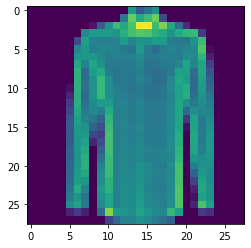

In [74]:
plt.imshow(np.reshape(X[62],(28,28)))

In [79]:
def softmax(x): # Softmax
    return np.exp(x) / np.sum(np.exp(x))

def score(a, b): # Scoring function
    return a @ b

def CELoss(X, Y, w): # Cross-entropy loss
    L = 0 # Define loss
    for i in range(X.shape[0]): # Iterate through X
        soft = softmax(score(w, X[i])) # Softmax
        L -= np.vdot(Y[i],np.log(soft)) # Cross Entropy Loss
    return L

def sgd(a, b): # Stochastic gradient descent
    return np.outer(a, b)
        

def main(X,Y,learning_rate):
    row = X.shape[0] # Initialize the row for "stochastic"
    iteration = 64 # Number of epochs
    X = np.insert(X,0,1,axis=1) # Add constant vector
    
    w = np.zeros((Y.shape[1], X.shape[1])) # Initialize the weight vectors
    loss = [] # Setup loss values list
    
    for ep in range(iteration):
        
        Loss = CELoss(X, Y, w) # Compute the loss value
        print('Loss is: ' + str(Loss)) # Print the loss for visualization
        loss.append(Loss) # Append loss to the loss values list
        
        prm = np.random.permutation(row) # Initialize the "stochastic"
        for i in prm:            
            soft = softmax(score(w, X[i])) # Softmax
            gradient = sgd(soft - Y[i], X[i]) # Stochastic gradient descent
            w = w - learning_rate * gradient # Update weight value
            
    return w, loss # Return the optimized weights and the loss values for visualization

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

In [81]:
y_train = pd.get_dummies(y_train).values

In [82]:
w, loss = main(X_train, y_train, 0.001)

Loss is: 27631.021115933076
Loss is: 8268.415040656462
Loss is: 7226.262448001501
Loss is: 6767.382772473149
Loss is: 6394.465303391466
Loss is: 6296.897563065255
Loss is: 6035.850238638522
Loss is: 5945.77274943469
Loss is: 5742.820846417547
Loss is: 5583.107096661842
Loss is: 5539.584094496993
Loss is: 5470.534832754961
Loss is: 5586.066603183942
Loss is: 5402.382679275986
Loss is: 5311.03928074379
Loss is: 5219.354119358939
Loss is: 5175.168923478166
Loss is: 5241.774503586024
Loss is: 5229.6130613611185
Loss is: 5269.170935767431
Loss is: 5033.60221454503
Loss is: 5078.233776613614
Loss is: 5001.2330212974875
Loss is: 5035.528116003125
Loss is: 4888.8692538914465
Loss is: 4942.198166340461
Loss is: 4937.820113644928
Loss is: 4861.874005534628
Loss is: 4786.05912688202
Loss is: 4810.37697607063
Loss is: 4781.495847702406
Loss is: 4733.675416547714
Loss is: 4847.124855442326
Loss is: 4774.8512304655
Loss is: 4804.121832998861
Loss is: 4699.411480551142
Loss is: 4762.817969494235
Loss

Text(0, 0.5, 'Loss value')

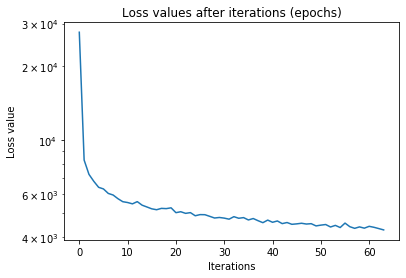

In [83]:
plt.semilogy(loss)
plt.title('Loss values after iterations (epochs)')
plt.xlabel('Iterations')
plt.ylabel('Loss value')

In [84]:
X_test = np.insert(X_test, 0, 1, axis=1) # Add constant vector
predictions = [] # Define a prediction list
for x in range(X_test.shape[0]):
    soft = softmax(score(w, X_test[x])) # Softmax
    prob = np.argmax(soft) # Find the index with maximum probability
    predictions.append(prob) # Add the final prediction to the list
    
accuracy = np.count_nonzero(pd.Series(predictions) == pd.Series(y_test)) / len(predictions) # Count our correctness
print("Our test accuracy is", accuracy)

Our test accuracy is 0.84325


In [85]:
print("Our test accuracy is", accuracy)

Our test accuracy is 0.84325
